# Computer Vision 

# Exercise 3: Linear Filtering

- TU Chemnitz
    - Fak. für Informatik
        - Professur Künstliche Intelligenz
            - Lehre
                - Bildverstehen
     
Contact:
* julien dot vitay at informatik dot tu-chemnitz dot de
* abbas dot al-ali at informatik dot tu-chemnitz dot de

Course web page:
[https://www.tu-chemnitz.de/informatik/KI/edu/biver/](https://www.tu-chemnitz.de/informatik/KI/edu/biver/)

## 1D Filtering

- Create a 1D step signal of length 101, with zeros everywhere except between 40 and 60 where it is one.

<img src="img/org-signal.png" alt="img/org-signal.png" width="400"/>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import cv2

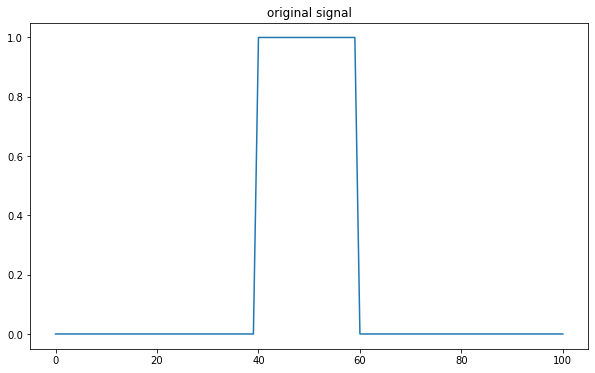

In [16]:
signal = np.zeros(101)
signal[40:60] = 1

plt.figure(figsize=(10,6))
plt.plot(signal)
plt.title('original signal')
plt.show()

- Write a `filter_signal(signal, filter)` method to filter this signal with a desired kernel (Box3 and Central Differences), using zero-padding.

$$ g(t) = \sum_{k=-1}^{+1} h(k) \cdot f(t + k) $$

- **Box filter of size 3**

$$ h_\text{low} = \frac{1}{3} \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} $$

- **Central differences**

$$ h_\text{high} = \begin{bmatrix} -1 & 0 & 1 \end{bmatrix} $$

- You will make the function robust to different signal lengths and kernel sizes.

- Zero-padding means that you will replace signal values $f(t + k)$ outside the range `[0, 100]` with zeros.

- The filtered signal should have the same length as the original signal.

- Plot the original signal with the two filtered versions.

- Conclude on the role of each filter.

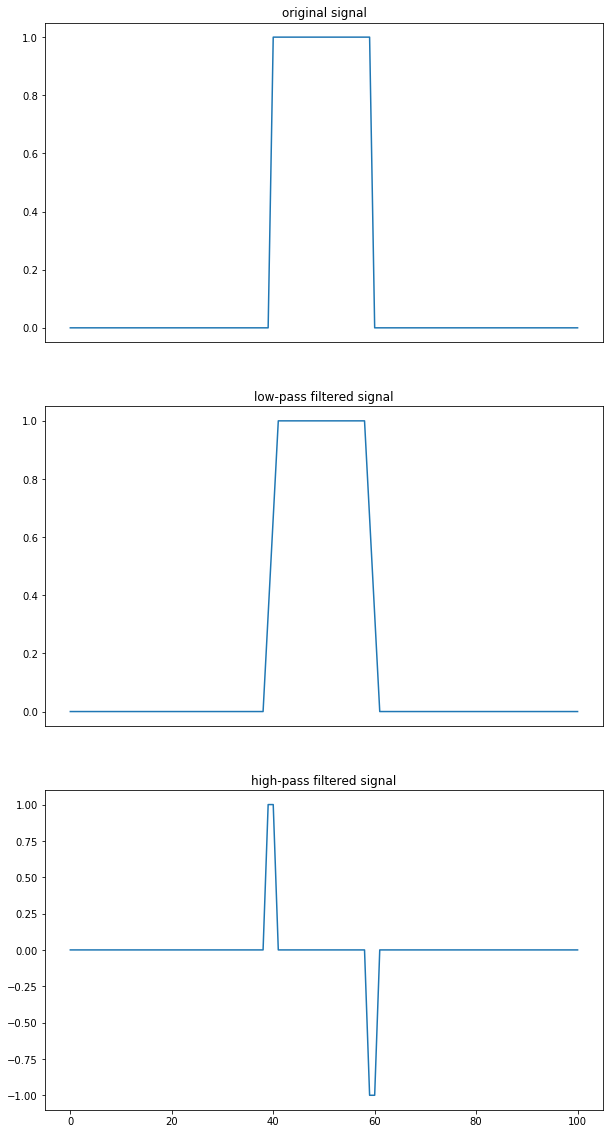

In [24]:
def filter_signal(signal, filter_kernel):
    result = np.zeros(signal.shape)
    
    # half of the kernel width
    khw = int((filter_kernel.size - 1) / 2)
    
    # pad signal
    signal_pad = np.pad(signal, khw)
    
    # relevant positions
    positions = range(khw, signal_pad.size - khw)
    
    for pos in positions:
        filtered_val = np.sum(signal_pad[pos - khw:pos + khw + 1] * filter_kernel)
        result[pos - khw] = filtered_val
    
    return result

low_filter  = np.array([1, 1, 1]) / 3
high_filter = np.array([-1, 0, 1])

signal_filtered_low = filter_signal(signal, low_filter)
signal_filtered_high = filter_signal(signal, high_filter)

""" # Print the filtered signals along with their indices
for idx,elem in enumerate(signal_filtered_low):
    print(idx, elem)

for idx,elem in enumerate(signal_filtered_high):
    print(idx, elem)
"""

plt.figure(figsize=(10,20))
plt.subplot(311)
plt.plot(signal)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('original signal')

plt.subplot(312)
plt.plot(signal_filtered_low)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('low-pass filtered signal')

plt.subplot(313)
plt.plot(signal_filtered_high)
plt.title('high-pass filtered signal')

plt.show()

## Effect of the width of the box filter

- Filter the signal with a box filter of size 11 (11 elements) and compare.

$$
    h_\text{low} = \frac{1}{11} \begin{bmatrix} 1 & 1 & \ldots & 1 & 1 \end{bmatrix}
$$

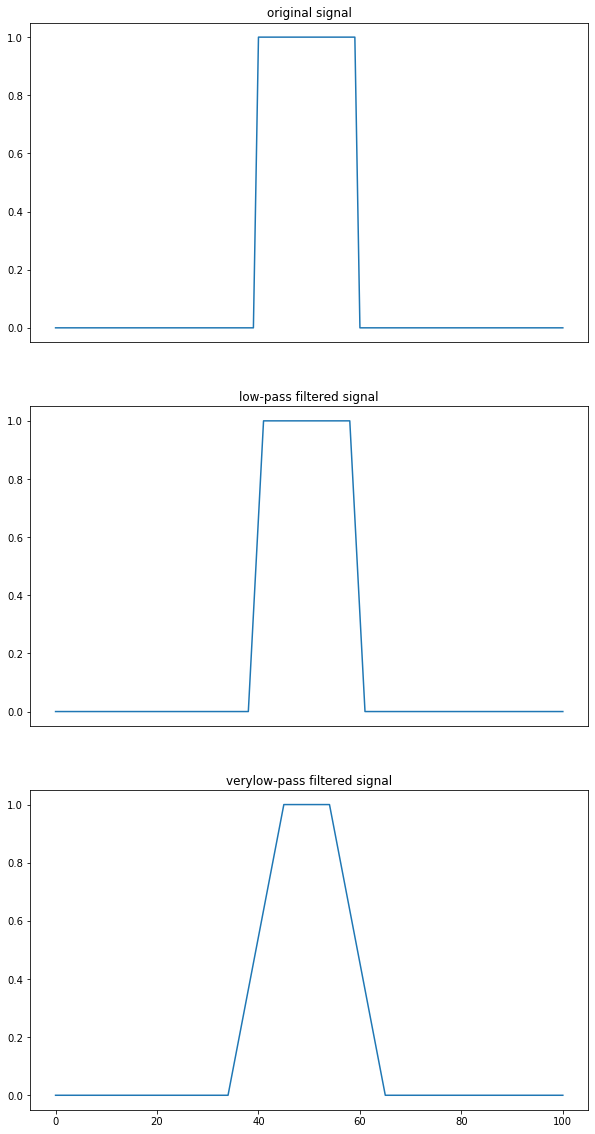

In [8]:
verylow_filter  = np.ones(11) / 11
signal_filtered_verylow = filter_signal(signal, verylow_filter)

plt.figure(figsize=(10,20))
plt.subplot(311)
plt.plot(signal)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('original signal')

plt.subplot(312)
plt.plot(signal_filtered_low)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('low-pass filtered signal')

plt.subplot(313)
plt.plot(signal_filtered_verylow)
plt.title('verylow-pass filtered signal')

plt.show()

## Effect of noise on highpass filtering

- Add Gaussian noise (zero mean, variance 0.3) to the original signal and filter it with the central differences filters. Can you still detect the edges?

```python
np.random.normal(0., 0.3, 101)
```

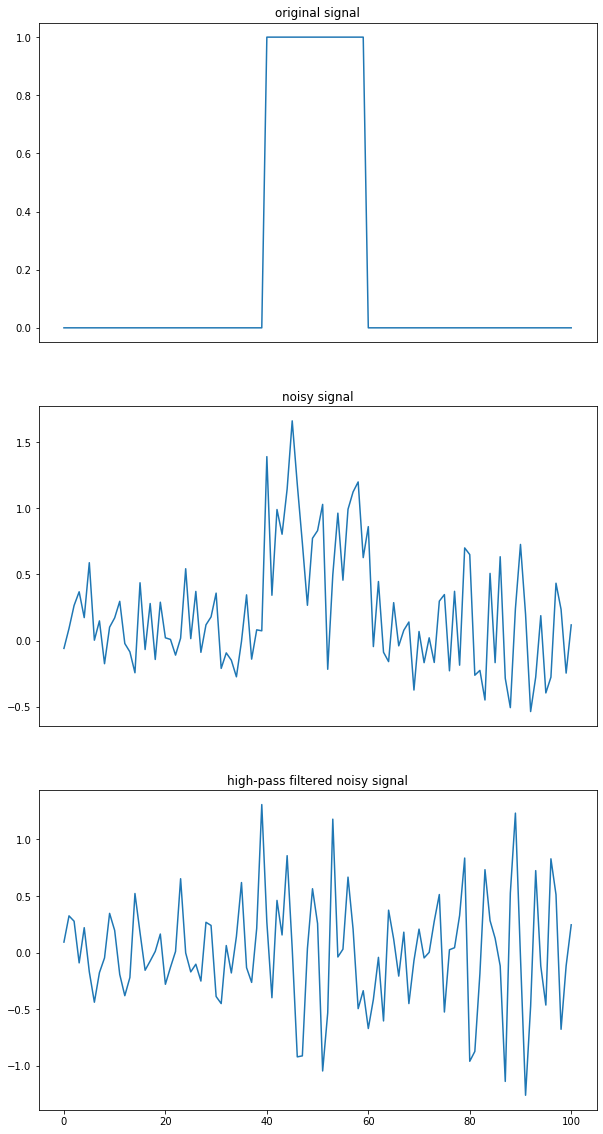

In [10]:
noisy_signal = signal + np.random.normal(0., 0.3, 101)
noisy_signal_filtered_high = filter_signal(noisy_signal, high_filter)

plt.figure(figsize=(10,20))
plt.subplot(311)
plt.plot(signal)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('original signal')

plt.subplot(312)
plt.plot(noisy_signal)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('noisy signal')

plt.subplot(313)
plt.plot(noisy_signal_filtered_high)
plt.title('high-pass filtered noisy signal')

plt.show()

- Filter first the noisy signal with the Box11 filter and then with the central differences ones. What happened?

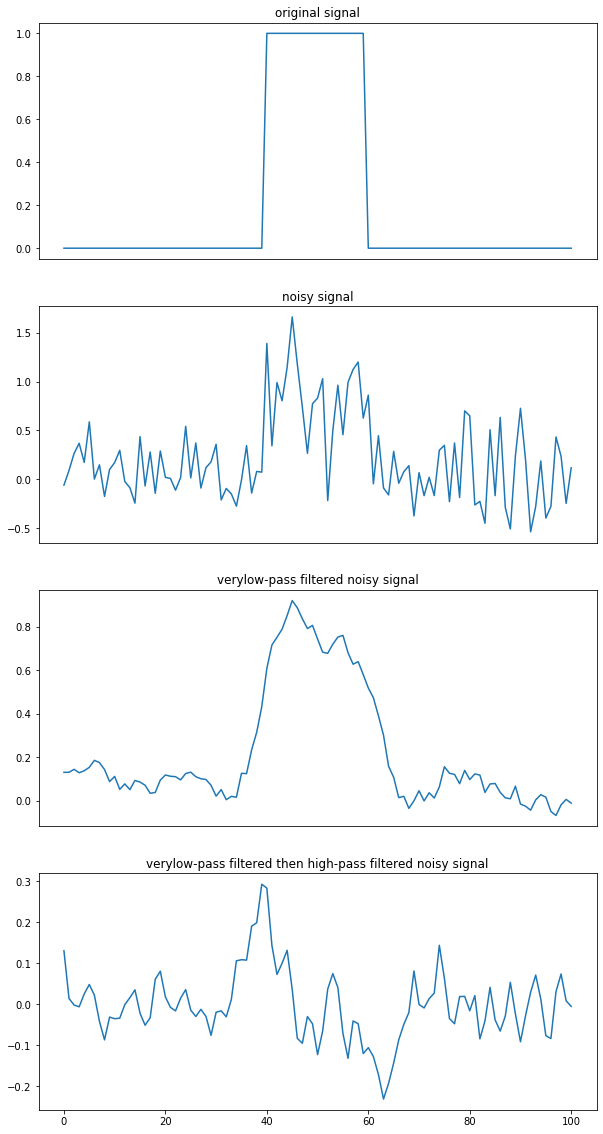

In [11]:
noisy_signal_cleaned = filter_signal(noisy_signal, verylow_filter)
noisy_signal_cleaned_filtered_high = filter_signal(noisy_signal_cleaned, high_filter)

plt.figure(figsize=(10,20))
plt.subplot(411)
plt.plot(signal)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('original signal')

plt.subplot(412)
plt.plot(noisy_signal)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('noisy signal')

plt.subplot(413)
plt.plot(noisy_signal_cleaned)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('verylow-pass filtered noisy signal')

plt.subplot(414)
plt.plot(noisy_signal_cleaned_filtered_high)
plt.title('verylow-pass filtered then high-pass filtered noisy signal')

plt.show()

## 2D Filtering

- A filter on 2D images works exactly the same as in 1D, except you have to do a double sum.

- We could implement it with for loops, but it is much faster to use the OpenCV method `filter2D`:

```python
# Load an image
img_gray = cv2.imread('lena.jpg', 0)
# Create a filter as a matrix
box3 = np.ones((3, 3))/9.
# Filter the image
result = cv2.filter2D(img, -1, box3)
```

- the first argument is the original image

- the second is the desired bit encoding: -1 to have the same depth as the original image (`cv2.CV_8U` or `np.uint8`), `cv2.CV_64F` for floats...

- the third is the desired filter.

Check the doc: [http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#filter2d](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#filter2d)

* Note that for filtering, it is better to work on grayscale images.

### Box filtering

- Apply a box filter with sizes ranging from 3 to 13 in steps of 2 on the `lena.jpg` image.

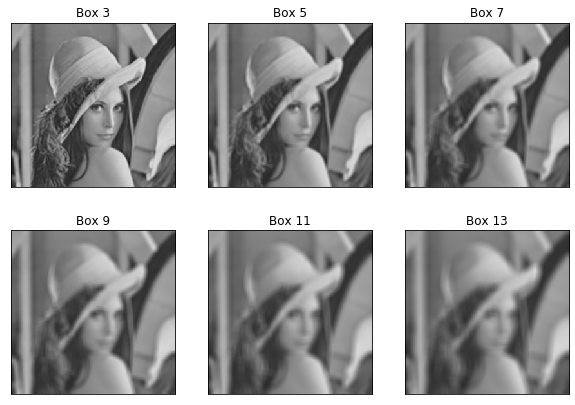

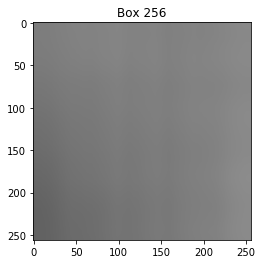

In [30]:
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)

plt.figure(figsize=(10,7))

idx = 1
for k in range(3, 15, 2):
    # Create the box filter
    box_filter = np.ones((k, k))/(k**2)
    # Filter the image
    result = cv2.filter2D(img, -1, box_filter)

    # Display the filtered image using matplotlib
    # Note that 'plt.imshow(result, cmap=plt.cm.gray)' will display
    # visually enhanced/modified images, so better use
    # 'plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))' in order
    # to display the proper non-modified images
    plt.subplot(230 + idx)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title('Box ' + str(k))
    idx +=1

plt.show()

# Bonus: filter the image with the biggest reasonable filter,
# i.e. a filter of the size of the input image
box_filter = np.ones((img.shape[0], img.shape[0]))/(img.shape[0]**2)
result = cv2.filter2D(img, -1, box_filter)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))
plt.title('Box ' + str(box_filter.shape[0]))
plt.show()

- For box filtering, you have basically three options:

**Method 1:** Create the box filter as a Numpy matrix and use it :

```python
# Create a kxk filter as a matrix
k = 11
box_filter = np.ones((k, k))/(k*k)
# Filter the image
result = cv2.filter2D(img, -1, box_filter)
```

**Method 2:** Ask OpenCV to apply directly the filter for you with `cv2.boxFilter`:

```python
result = cv2.boxFilter(img, -1, (11, 11))
```

The second argument is the bit encoding, the third is the kernel size (here 11x11)

**Method 3:** Use the ``blur()`` method, which does exactly the same operation:

```python
result = cv2.blur(img, (11, 11))
```

- Check the doc: [http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#boxfilter](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#boxfilter) and try the second option with different kernel sizes. Is there any difference?

- Apply the three methods using a box filter with size 11 on the `lena.jpg` image.

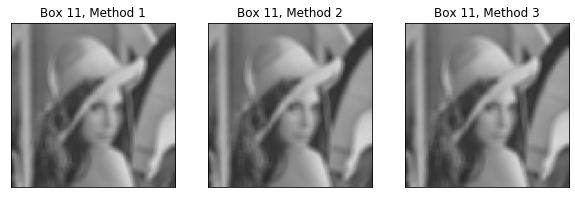

Method 1 equals Method 2: True
Method 2 equals Method 3: True


In [31]:
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)

plt.figure(figsize=(10,7))

# Box filter method 1
box_filter = np.ones((11, 11))/(11**2)
result1 = cv2.filter2D(img, -1, box_filter)

plt.subplot(131)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Box 11, Method 1')
     
# Box filter method 2
result2 = cv2.boxFilter(img, -1, (11, 11))
plt.subplot(132)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Box 11, Method 2')

# Box filter method 3
plt.subplot(133)
result3 = cv2.blur(img, (11, 11))
plt.imshow(cv2.cvtColor(result3, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Box 11, Method 3')

plt.show()

print("Method 1 equals Method 2: " + str(
        np.array_equal(result1, result2)))
print("Method 2 equals Method 3: " + str(
        np.array_equal(result2, result3)))

### Gaussian Filtering

The same is true for Gaussian filters:

**Method 1:** Create your own Gaussian kernel and pass it to `filter2D`. Example for a 5x5 Gaussian filter:

$$
h = \frac{1}{256} \begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \\ \end{bmatrix} 
$$

- Create a 5x5 Gaussian filter and apply it on the `lena.jpg` image.

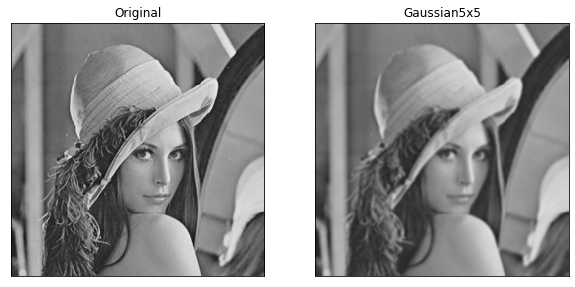

In [36]:
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)

plt.figure(figsize=(10,7))

# Gaussian filter method 1
Gaussian5x5 = 1/256 * np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
result = cv2.filter2D(img, -1, Gaussian5x5)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Gaussian5x5')

plt.show()

# Separable filters

The problem is that you do not obligatorily know exact values for a 11x11 Gaussian filter, and that it would make a **lot** of values to type ...

<img src="img/separable.png" alt="img/separable.png" width="800"/>


**Method 2:** Ask OpenCV to create a **1D** Gaussian filter (separable filters) and apply it in both directions using ``sepFilter2D()``:

```python
gaussian_kernel = cv2.getGaussianKernel(11, -1)

result = cv2.sepFilter2D(img, -1, gaussian_kernel, gaussian_kernel)
```

- Look at the documentation of `sepFilter2D` to understand how it works.


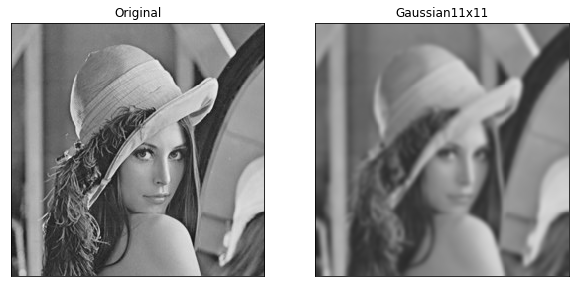

In [37]:
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)

plt.figure(figsize=(10,7))

# Gaussian filter method 2
Gaussian11x11 = cv2.getGaussianKernel(11, -1)
result = cv2.sepFilter2D(img, -1, Gaussian11x11, Gaussian11x11)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Original')

plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Gaussian11x11')

plt.show()

**Method 3:** Use the `GaussianBlur()` method directly:

```python
result = cv2.GaussianBlur(img, (11,11), -1)
```

- Check the doc of `GaussianBlur`. What does the third argument -1 do?


- Visualize the Gaussian kernel for different sizes.

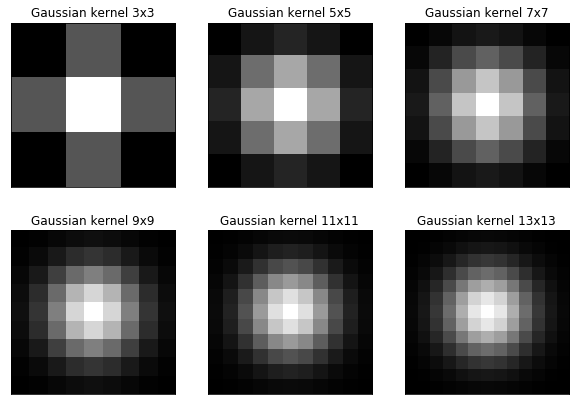

In [44]:
plt.figure(figsize=(10,7))

idx = 1
for k in range(3, 15, 2):
    # Create the Gaussian kernel
    gaussian_kernel_1d = cv2.getGaussianKernel(k, -1)
    gaussian_kernel_2d = np.dot(gaussian_kernel_1d, gaussian_kernel_1d.T)
    
    # Normalize and type convert Gaussian kernel to uint8 to make
    # it displayable via matplotlib
    gaussian_kernel_2d_disp = cv2.normalize(gaussian_kernel_2d, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Display the kernel as image using matplotlib
    plt.subplot(230 + idx)
    plt.imshow(cv2.cvtColor(gaussian_kernel_2d_disp, cv2.COLOR_GRAY2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title('Gaussian kernel ' + str(k) + 'x' + str(k))
    idx +=1
       
plt.show()

- Apply a gaussian filter with sizes ranging from 3 to 13 in steps of 2.

- Visualize the Gaussian blurred image for different kernel sizes.

- Compare with the results you obtained with the box filter. Is Gaussian filtering better?

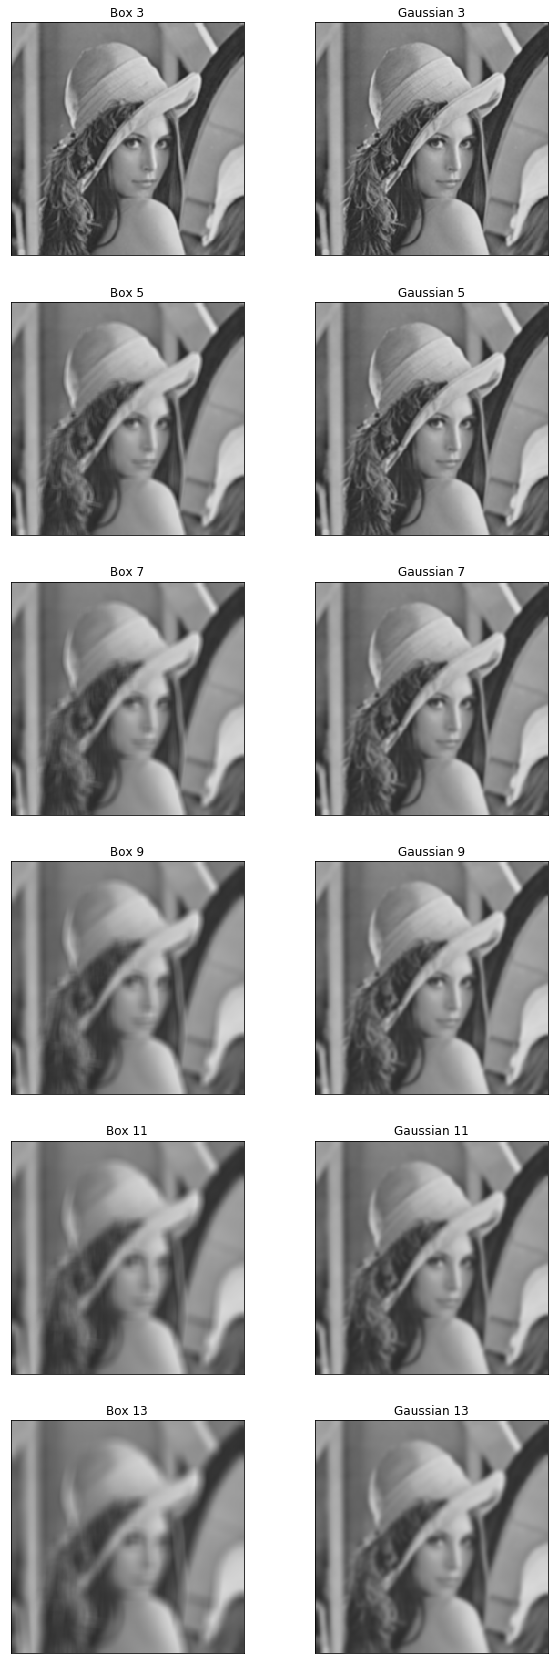

In [52]:
# Load Lena in grayscale
img = cv2.imread('lena.jpg', 0)

plt.figure(figsize=(10,30))

idx = 1
for k in range(3, 15, 2):
    # Filter the image
    result_box = cv2.blur(img, (k, k))
    result_gaussian = cv2.GaussianBlur(img, (k, k), -1)

    # Display the filtered images using matplotlib
    plt.subplot(6,2,0 + idx)
    plt.imshow(cv2.cvtColor(result_box, cv2.COLOR_GRAY2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title('Box ' + str(k))
    
    plt.subplot(6,2,0 + idx + 1)
    plt.imshow(cv2.cvtColor(result_gaussian, cv2.COLOR_GRAY2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.title('Gaussian ' + str(k))

    idx +=2

plt.show()